<a href="https://colab.research.google.com/github/rstk17/dicod/blob/main/dashboard_ecommerce_public_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

In [ ]:
def create_daily_orders_df(df):
    daily_orders_df = df.resample(rule='D', on='shipping_limit_date').agg({
        "order_id": "nunique",
        "price": "sum"
    })
    daily_orders_df = daily_orders_df.reset_index()
    daily_orders_df.rename(columns={
        "order_id": "order_count",
        "price": "revenue"
    }, inplace=True)

    return daily_orders_df

In [ ]:
def create_sum_order_items_df(df):
    sum_order_items_df = df.groupby("product_category_name").order_id.count().sort_values(ascending=False).reset_index()
    return sum_order_items_df

In [ ]:
def create_bysellercity_df(df):
    bysellercity_df = df.groupby("seller_city").price.sum().sort_values(ascending=False).reset_index()
    return bysellercity_df

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
dataset=pd.read_csv("/dataset")

In [ ]:
datetime_columns = ["shipping_limit_date"]
dataset.sort_values(by="shipping_limit_date", inplace=True)
dataset.reset_index(inplace=True)

for column in datetime_columns:
    dataset[column] = pd.to_datetime(dataset[column])

In [ ]:
min_date = dataset["shipping_limit_date"].min()
max_date = dataset["shipping_limit_date"].max()

with st.sidebar:
    # Menambahkan logo perusahaan
    st.image("https://github.com/dicodingacademy/assets/raw/main/logo.png")

    # Mengambil start_date & end_date dari date_input
    start_date, end_date = st.date_input(
        label='Rentang Waktu',min_value=min_date,
        max_value=max_date,
        value=[min_date, max_date]
    )

In [ ]:
main_df = dataset[(dataset["shipping_limit_date"] >= str(start_date)) &
                 (dataset["shipping_limit_date"] <= str(end_date))]

In [ ]:
daily_orders_df = create_daily_orders_df(main_df)
sum_order_items_df = create_sum_order_items_df(main_df)
bysellercity_df = create_bysellercity_df(main_df)

In [ ]:
st.header(':rainbow: Ecommerce Public Dashboard :rainbow:')

DeltaGenerator()

DeltaGenerator()

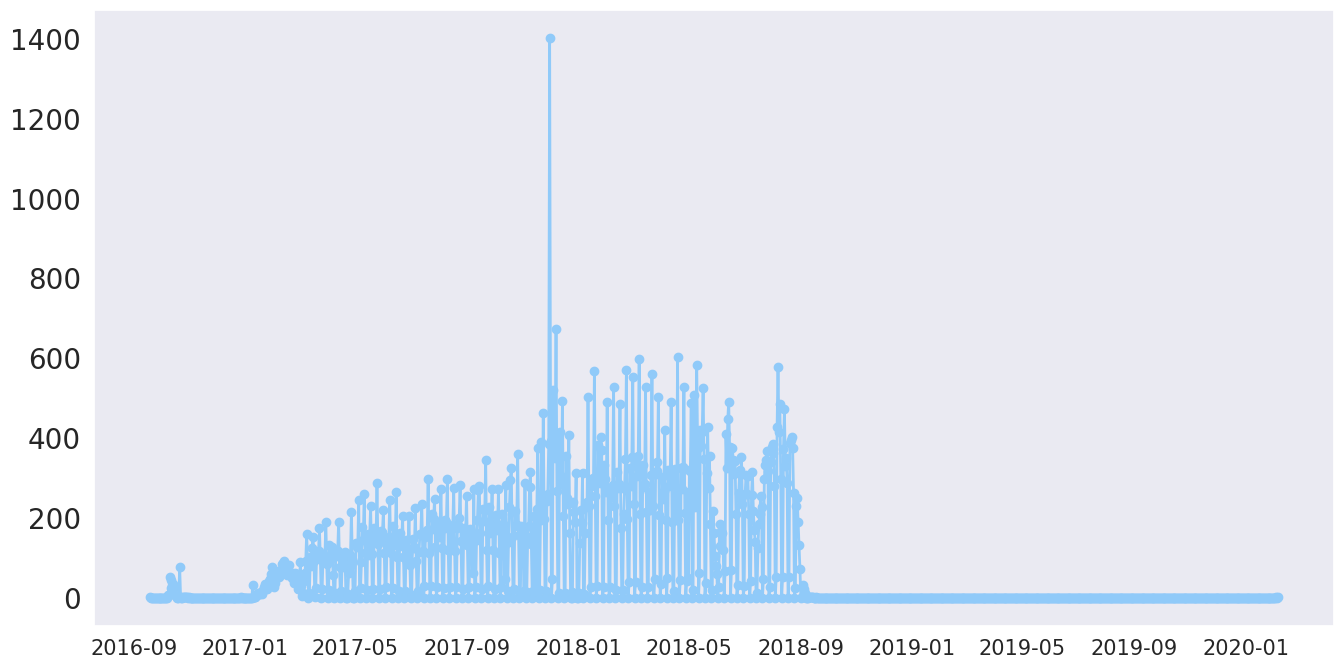

In [ ]:
st.subheader('Daily Orders')

col1, col2 = st.columns(2)

with col1:
    total_orders = daily_orders_df.order_count.sum()
    st.metric("Total orders", value=total_orders)

with col2:
    total_revenue = format_currency(daily_orders_df.revenue.sum(), "AUD", locale='es_CO')
    st.metric("Total Revenue", value=total_revenue)

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    daily_orders_df["shipping_limit_date"],
    daily_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

st.pyplot(fig)

In [ ]:
st.subheader("Best & Worst Number of Order Product")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of Order", fontsize=30)
ax[0].set_title("Best Number of Order Product", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Order", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Number of Order Product", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

st.pyplot(fig)

DeltaGenerator()

In [ ]:
st.subheader("Best & Worst Performing City")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

colors = ["#A52A2A", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="price", y="seller_city", data=bysellercity_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Sales", fontsize=30)
ax[0].set_title("Best Performing Product", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="price", y="seller_city", data=bysellercity_df.sort_values(by="price", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Sales", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

st.pyplot(fig)

DeltaGenerator()